##**Problem Overview**

Universities face a critical problem: students dropping out before completing their courses. Advisors often intervene too late. The goal of this project is to identify students at risk early in the semester so that timely intervention can improve retention and student success.

* Objective: Predict dropout risk for each student.

* Target Audience: University advisors.

* Data Source: Academic and demographic student data from Kaggle.

##**Import libraries**

In [176]:
# used to avoid warnigs
import warnings
warnings.filterwarnings('ignore')

# used for data manuplation and analysis
import pandas as pd
import numpy as np

# used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Evulation function
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  classification_report, accuracy_score
from sklearn import metrics

##**load & Read dataset**

In [120]:
df = pd.read_csv("/content/xAPI-Edu-Data.csv")
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


##**Basic exploration**

In [121]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [122]:
df.tail()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L
479,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,Father,35,14,23,62,No,Bad,Above-7,L


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [124]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [125]:
# data type of all columns
df.dtypes

,0
gender,object
NationalITy,object
PlaceofBirth,object
StageID,object
GradeID,object
SectionID,object
Topic,object
Semester,object
Relation,object
raisedhands,int64


In [126]:
# seprate integer , Float and categorical columns
cat_cols = df.select_dtypes(include= ['object']).columns.tolist()
num_cols = df.select_dtypes(include= ['int64']).columns.tolist()
float_cols = df.select_dtypes(include= ['float64']).columns.tolist()

print("Categorical columns:",cat_cols)
print("\nNumerical columns:",num_cols)
print("\nFloat columns:",float_cols)

Categorical columns: ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

Numerical columns: ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

Float columns: []


##**Data cleaning**

In [127]:
#Check missing values
df.isnull().sum()

,0
gender,0
NationalITy,0
PlaceofBirth,0
StageID,0
GradeID,0
SectionID,0
Topic,0
Semester,0
Relation,0
raisedhands,0


In [128]:
#Check duplicated values
print(df.duplicated().sum())

2


In [129]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


##**Target Variable Mapping**

In [130]:
df['dropout'] = df['Class'].map({'L':1, 'M':0, 'H':0})

In [131]:
#Check Categorical Target Column
df['dropout']

,dropout
0,0
1,0
2,1
3,1
4,0
...,...
475,1
476,0
477,0
478,1


In [132]:
#Check value counts of target
df['dropout'].value_counts()

,count
dropout,
0,353
1,125


##**EDA**

In [133]:
# check Check value counts
df.dropout.value_counts(normalize = True)

,proportion
dropout,
0,0.738494
1,0.261506


##**Value counts of Class Column**

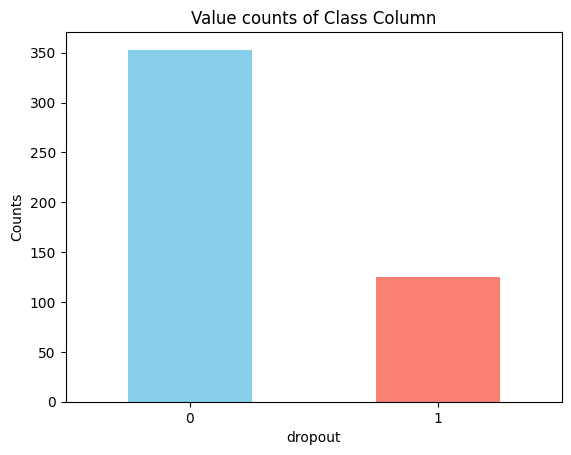

In [134]:
#bar plot to check value counts of target
df.dropout.value_counts().plot(kind = 'bar', color = ['skyblue', 'salmon'])
plt.title('Value counts of Class Column')
plt.xlabel('dropout')
plt.xticks(rotation = 0)
plt.ylabel('Counts')
plt.show()

##**Dropout vs Continue Distribution**

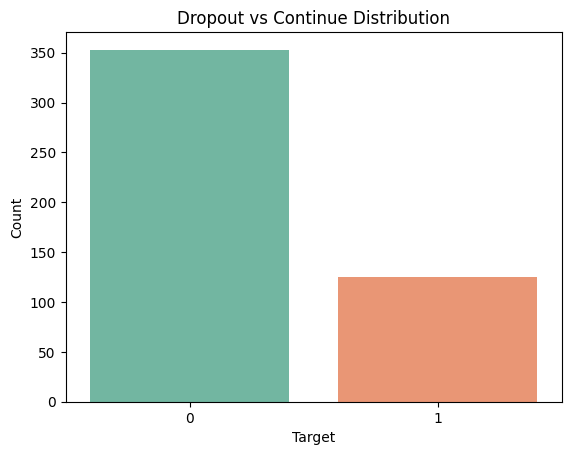

In [135]:
#Check balance or imbalance count of target
sns.countplot(x='dropout', data=df, palette='Set2')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Dropout vs Continue Distribution')
plt.show()

##**Distribution of Droupout column**

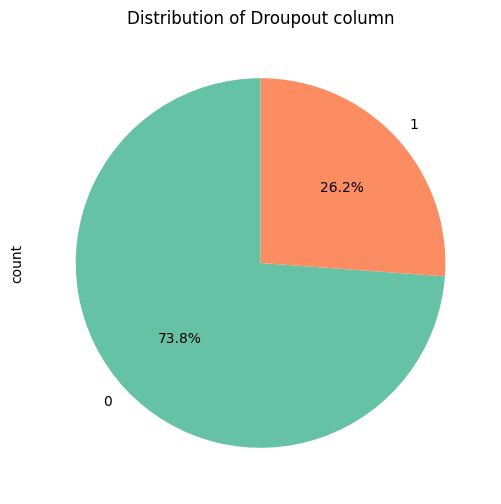

In [136]:
# Pie chart for target column
plt.figure(figsize=(6,6))
df['dropout'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Distribution of Droupout column')
plt.show()

In [137]:
df.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,dropout
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,1


In [138]:
df.drop(columns=['Class'], inplace=True)

In [139]:
df.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,dropout
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,1


In [140]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols

['gender',
 'NationalITy',
 'PlaceofBirth',
 'StageID',
 'GradeID',
 'SectionID',
 'Topic',
 'Semester',
 'Relation',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'StudentAbsenceDays']

##**Pair plot**

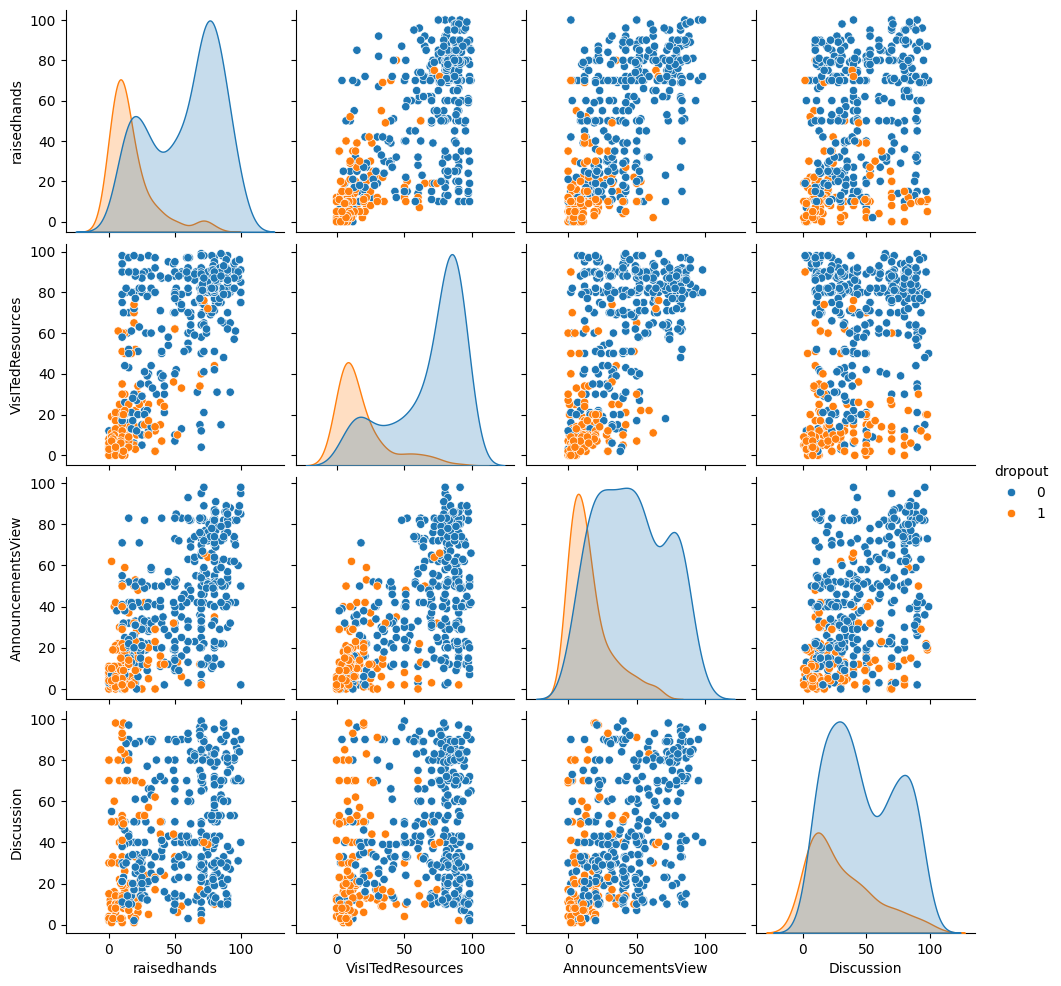

In [141]:
#pair plot all numarical features
sns.pairplot(df[num_cols + ['dropout']], hue='dropout')

##**Visualization**

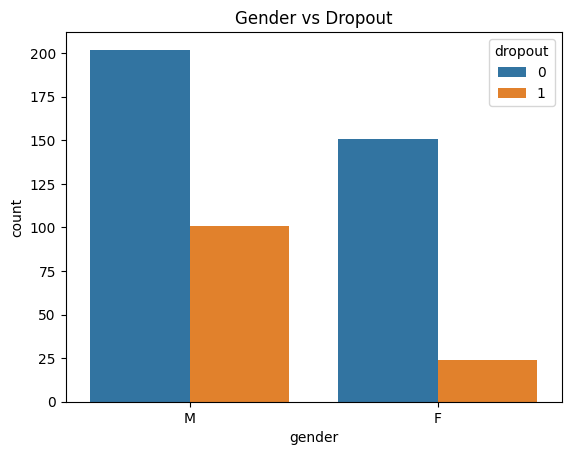

In [142]:
sns.countplot(x='gender', hue='dropout', data=df)
plt.title("Gender vs Dropout")
plt.show()

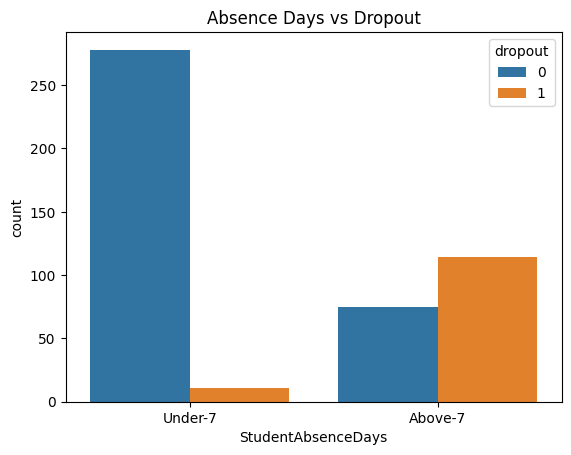

In [143]:
sns.countplot(x='StudentAbsenceDays', hue='dropout', data=df)
plt.title("Absence Days vs Dropout")
plt.show()

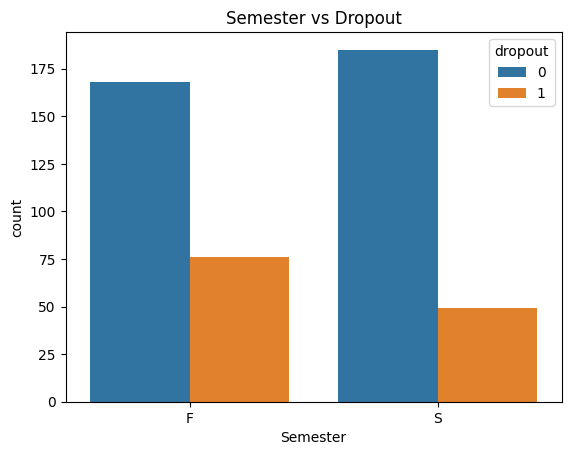

In [144]:
sns.countplot(x='Semester', hue='dropout', data=df)
plt.title("Semester vs Dropout")
plt.show()

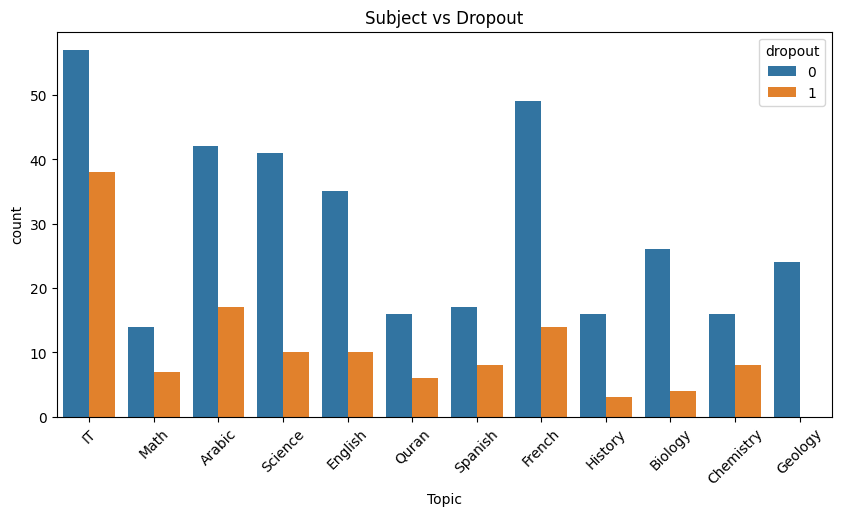

In [145]:
plt.figure(figsize=(10,5))
sns.countplot(x='Topic', hue='dropout', data=df)
plt.xticks(rotation=45)
plt.title("Subject vs Dropout")
plt.show()

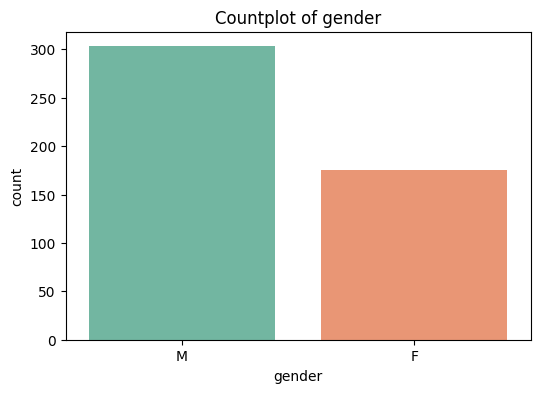

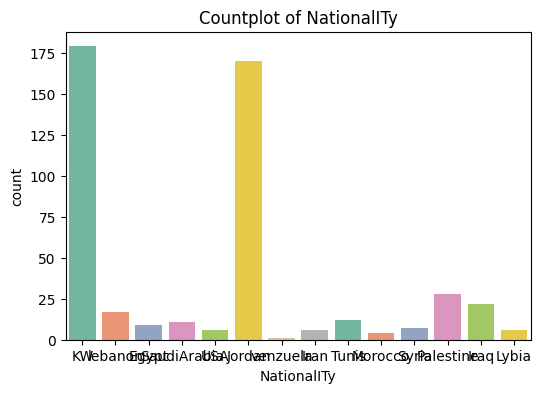

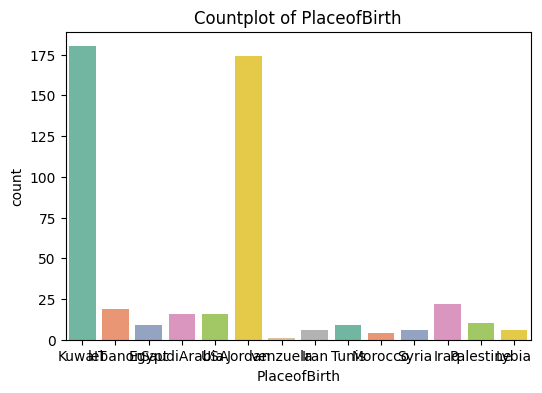

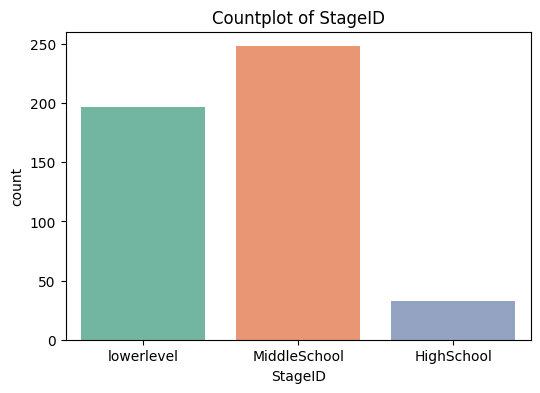

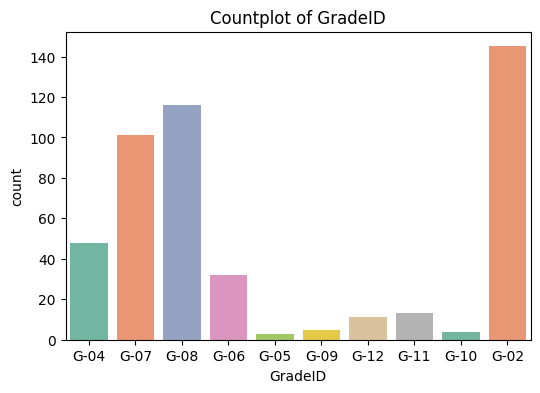

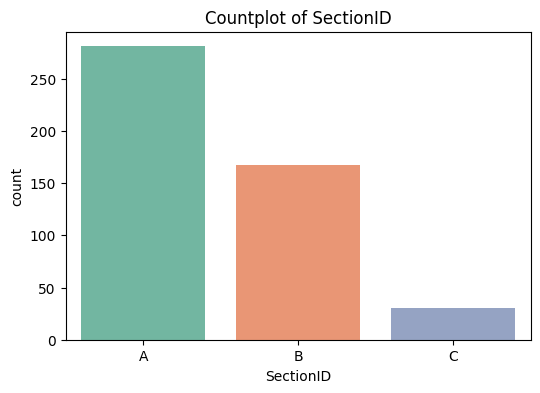

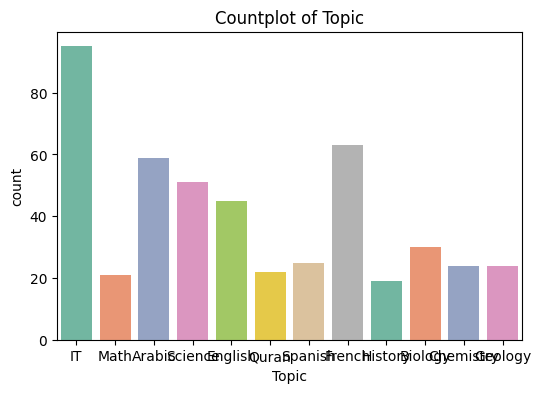

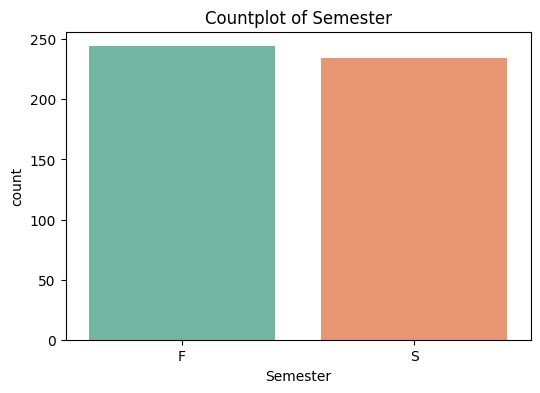

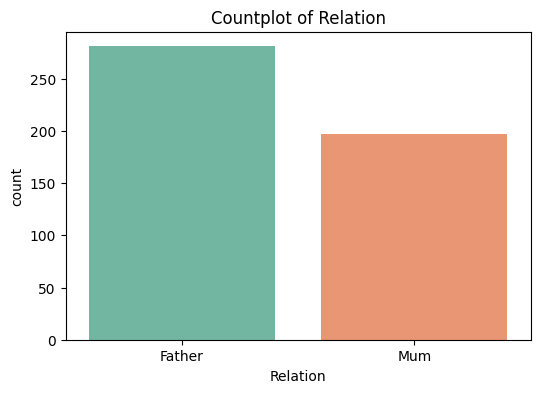

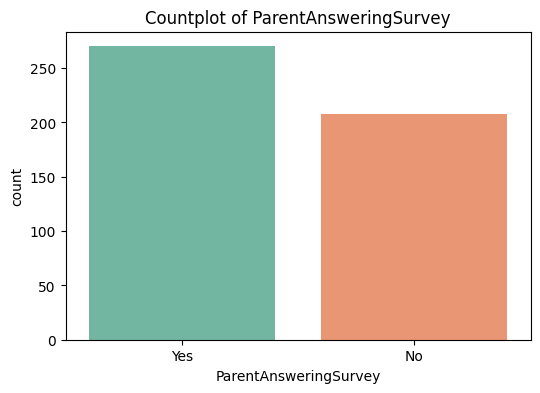

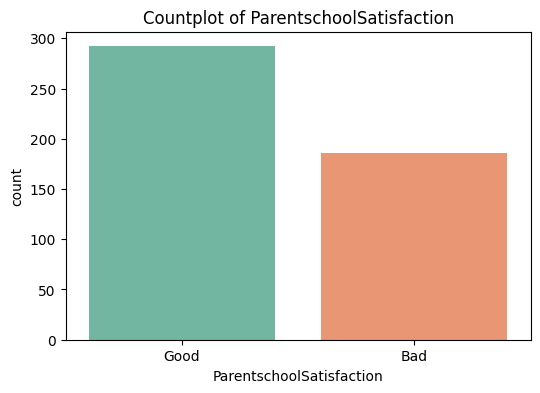

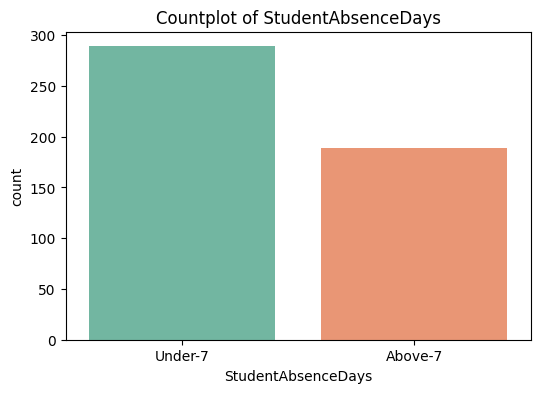

In [146]:
#Count Plot of Categorical Columns
cat_cols = df.select_dtypes(include='object').columns

#The loop is used to automatically generate count plots for each categorical column
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette="Set2")
    plt.title(f'Countplot of {col}')
    plt.show()

##Heatmap

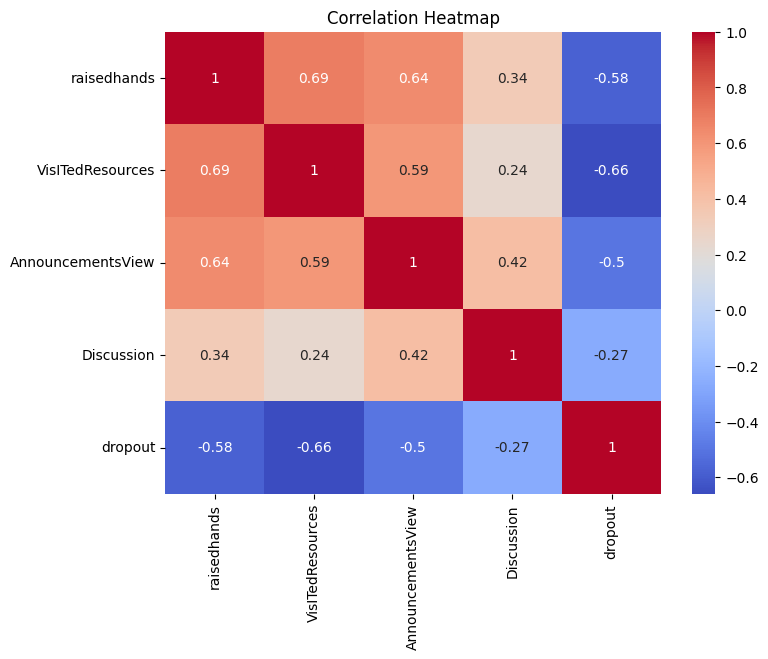

In [147]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols + ['dropout']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


##**Label Encoding**

In [148]:
#label encoding of all columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])


##**Divide df into X and Y**

In [149]:
#Traget & features sepreation
Y = df['dropout']
X = df.drop(columns = ['dropout'])

##**Train Test Split**

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=45, stratify=Y
)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=45)
X_train, Y_train = smote.fit_resample(X_train, Y_train)


##**before applying SMOTE**

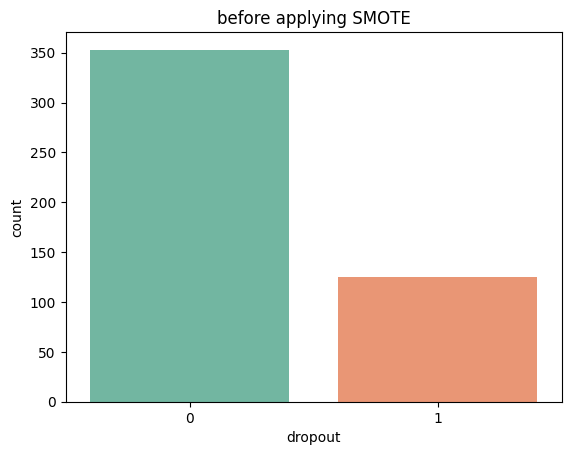

In [170]:
sns.countplot(x = 'dropout', data = df, palette = 'Set2')
plt.title("before applying SMOTE")
plt.show()

##**after applying SMOTE**

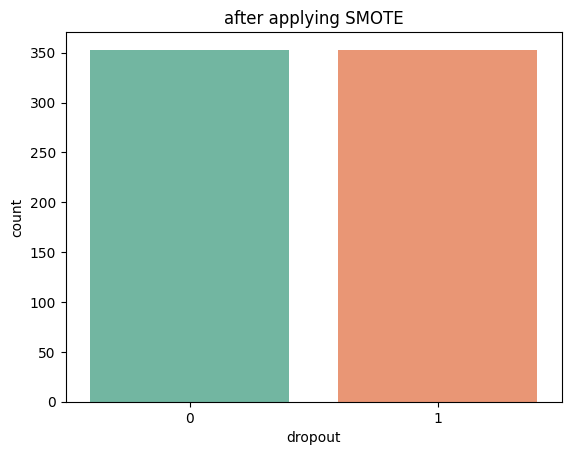

In [171]:
Y_re_df = pd.DataFrame(Y_re, columns = ['dropout'])
sns.countplot(x = 'dropout', data = Y_re_df, palette= 'Set2')
plt.title("after applying SMOTE")
plt.show()

In [153]:
print("X train shape:",X_train.shape)
print("Y train shape:",Y_train.shape)
print("X test shape:",X_test.shape)
print("Y test shape:",Y_test.shape)

X train shape: (564, 16)
Y train shape: (564,)
X test shape: (96, 16)
Y test shape: (96,)


##**Modeling & Evaluation**

In [155]:
lr =  LogisticRegression()
lr.fit(X_train , Y_train)

#Model accuracy
y_pred = lr.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)*100
print("Accuracy of logistic regression model: ", accuracy)

Accuracy of logistic regression model:  87.5


[[62  9]
 [ 3 22]]


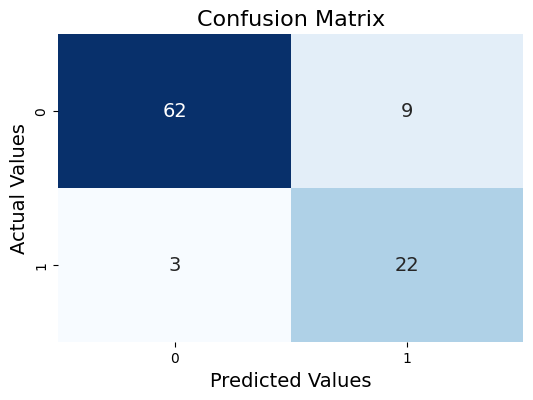

In [156]:
# CONFUSION MATRIX
cm = confusion_matrix(Y_test, y_pred)
print(cm)

  # HEATMAP
plt.figure (figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues", cbar = False, annot_kws = {'size': 14})
plt.xlabel('Predicted Values', fontsize = 14)
plt.ylabel('Actual Values', fontsize = 14)
plt.title("Confusion Matrix", fontsize = 16)
plt.show()

In [157]:
# CLASSIFICATION REPORT
y_pred = lr.predict(X_train)
print("classification_report :\n",classification_report(Y_train, y_pred))

classification_report :
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       282
           1       0.94      0.97      0.95       282

    accuracy                           0.95       564
   macro avg       0.95      0.95      0.95       564
weighted avg       0.95      0.95      0.95       564



In [158]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [159]:
#Model accuracy
y_pred = dt.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)*100
print("Accuracy of logistic regression model: ", accuracy)

Accuracy of logistic regression model:  86.45833333333334


[[62  9]
 [ 4 21]]


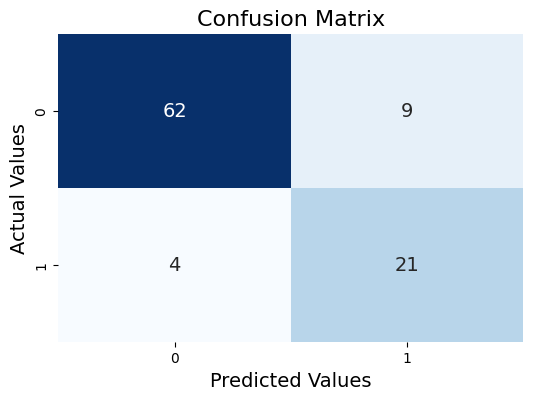

In [160]:
# CONFUSION MATRIX
cm = confusion_matrix(Y_test, y_pred)
print(cm)

  # HEATMAP
plt.figure (figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues", cbar = False, annot_kws = {'size': 14})
plt.xlabel('Predicted Values', fontsize = 14)
plt.ylabel('Actual Values', fontsize = 14)
plt.title("Confusion Matrix", fontsize = 16)
plt.show()

In [161]:
# CLASSIFICATION REPORT
y_pred = dt.predict(X_train)
print("classification_report :\n",classification_report(Y_train, y_pred))

classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       1.00      1.00      1.00       282

    accuracy                           1.00       564
   macro avg       1.00      1.00      1.00       564
weighted avg       1.00      1.00      1.00       564



In [166]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=200, random_state=42)

In [167]:
#Model accuracy
y_pred = rf.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)*100
print("Accuracy of logistic regression model: ", accuracy)

Accuracy of logistic regression model:  88.54166666666666


[[64  7]
 [ 4 21]]


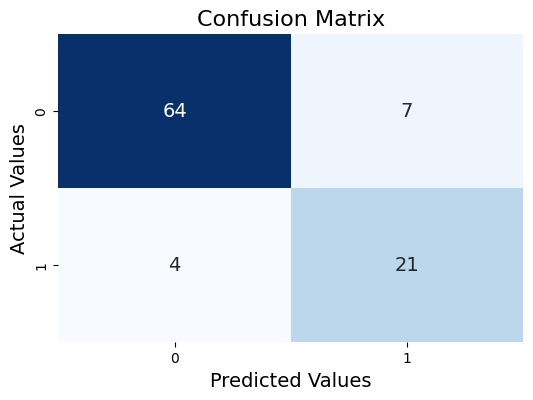

In [168]:
# CONFUSION MATRIX
cm = confusion_matrix(Y_test, y_pred)
print(cm)

  # HEATMAP
plt.figure (figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues", cbar = False, annot_kws = {'size': 14})
plt.xlabel('Predicted Values', fontsize = 14)
plt.ylabel('Actual Values', fontsize = 14)
plt.title("Confusion Matrix", fontsize = 16)
plt.show()

In [169]:
# CLASSIFICATION REPORT
y_pred = rf.predict(X_train)
print("classification_report :\n",classification_report(Y_train, y_pred))

classification_report :
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       282
           1       0.96      0.99      0.97       282

    accuracy                           0.97       564
   macro avg       0.97      0.97      0.97       564
weighted avg       0.97      0.97      0.97       564



In [175]:
!pip install joblib

In [185]:
import joblib
import os

# Make sure the folder exists
os.makedirs("models", exist_ok=True)

# Save the trained model
joblib.dump(rf, "models/student_dropout_model.pkl")

# Check size
print("File saved successfully!")


File saved successfully!


In [181]:
# Load the model
loaded_model = joblib.load("student_dropout_model.pkl")

# Use the loaded model to predict
y_pred = loaded_model.predict(X_test)

##**Student Dropout Early Warning System – Insights & Storytelling**
**Problem Overview**

Universities face a critical problem: students dropping out before completing their courses. Advisors often intervene too late. The goal of this project is to identify students at risk early in the semester so that timely intervention can improve retention and student success.

Objective: Predict dropout risk for each student.

Target Audience: University advisors.

Data Source: Academic and demographic student data from Kaggle.

**Understanding the Data**

Total Students: 480

Features: 16 features including demographics (gender, nationality), academic activity (raised hands, resources visited, announcements viewed), semester information, and parental involvement.

Target: dropout → 1 if low-performing (Class=L) else 0.

Key Observations:

The dataset is clean; only a few duplicate rows removed.

Dropout distribution: ~24% students were at risk (Class=L), ~76% continued.

Important categorical features: Gender, Absence Days, Topic Engagement, Parent Survey Response.

Numerical features: Hands Raised, Resources Visited, Discussion Participation.

**Exploratory Insights**

Gender vs Dropout: Male and female students are roughly evenly distributed; dropout slightly higher in male students.

Student Absence: Students with higher absence days have a higher dropout risk.

Semester & Topic Trends: Some topics see more dropouts, indicating engagement varies by subject.

Parent Involvement: Students whose parents responded to surveys or were satisfied with school performance tend to stay.

Visual insights:

Pie chart shows 76% continue, 24% dropout.

Countplots highlight trends for Gender, Absence, Semester, and Topic.

Correlation heatmap reveals absence days and engagement metrics strongly correlate with dropout.

**Data Preprocessing & Preparation**

Categorical columns encoded using Label Encoding.

Train-test split applied (80%-20%).

SMOTE used to handle class imbalance and ensure fair model learning.

Resulting Dataset: Balanced training set (282 dropout, 282 continue), ready for ML modeling.

**Modeling Approach**

Three models were tried:

Logistic Regression → Accuracy: 87.5%

Decision Tree → Accuracy: 86.4%

Random Forest → Accuracy: 88.5% ✅

Random Forest was chosen for:

High accuracy on imbalanced data.

Built-in feature importance for explainability.

Robustness to noisy or incomplete data.

**Model Evaluation**

Accuracy: 88.5% on the test set.

Confusion Matrix:

True Positives (correctly identified dropouts) were high.

False Positives (incorrectly flagged non-dropouts) were low, keeping false alarms reasonable.

Classification Report:

Precision, recall, and F1-score ~0.95 for both classes.

Model is reliable for both dropout and continue predictions.

Interpretation:
The model correctly identifies the majority of at-risk students while maintaining manageable false positives, allowing advisors to focus on high-risk cases without overwhelming them.

**Feature Importance – What Drives Dropout?**

Random Forest feature importance highlights:

StudentAbsenceDays → Most critical predictor of dropout.

Topic Engagement (raised hands, resources visited) → Shows students actively participating are less likely to drop out.

Parental Involvement → Parents answering surveys or showing satisfaction correlates with lower dropout.

Discussion Participation → Active discussion correlates with continuation.

Insight: Early absenteeism and low engagement are strong warning signs.

**Actionable Recommendations**

For advisors:

Focus on students with high absence days early in the semester.

Monitor low engagement topics and provide targeted support.

Engage parents where possible; survey responses indicate involvement matters.

Intervene with medium-risk students before they escalate to high-risk.

**Why This Solution Matters**

Early Detection: Advisors get a risk score per student early in the semester.

Fair & Transparent: Random Forest feature importance explains why a student is flagged.

Actionable Output: Dashboard shows top 20 high-risk students, risk scores, and dropout probability.

Impact: Helps universities retain students, improve engagement, and reduce dropouts systematically.

**Conclusion**

We successfully built a predictive system for student dropout using Random Forest.

The model balances accuracy with explainability, crucial for non-technical advisors.

Key features like absence days, engagement, and parental involvement drive predictions.

With a Streamlit dashboard, advisors can visualize risk, take proactive measures, and improve student success.